In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import ElasticNet, Lasso, Ridge
import matplotlib.pyplot as plt



In [122]:
df=pd.read_csv('Fraud.csv')


In [123]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [124]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [125]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [126]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
df['type']=la.fit_transform(df['type'])

In [127]:
df['type'].value_counts()


1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: type, dtype: int64

In [128]:
Train=df.drop('isFraud',axis=1)
scaler = preprocessing.MinMaxScaler()
Train_scaled = scaler.fit_transform(Train)
Test=df['isFraud']

In [129]:
#TRAIN/TEST/CV SETS
X_train, X_test, Y_train, Y_test = train_test_split(Train_scaled, Test,
    test_size=0.2,random_state = 0)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
    test_size=0.25, random_state= 0) # 0.25 x 0.8 = 0.2
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(Y_train.shape))
print("y_test shape: {}".format(Y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(Y_val.shape))

X_train shape: (3817572, 8)
X_test shape: (1272524, 8)
y_train shape: (3817572,)
y_test shape: (1272524,)
X_val shape: (1272524, 8)
y_val shape: (1272524,)


In [130]:
################### Degree 1 ################
lr_clf=LogisticRegression()
lr_clf.fit(X_train,Y_train)
lr_pred=lr_clf.predict(X_test)
print("Accuracy : {:0.10f}".format(accuracy_score(Y_test,lr_pred)))
rmse = (np.sqrt(mean_squared_error(Y_test, lr_pred)))
r2 = r2_score(Y_test, lr_pred)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Coffiecients: {}".format(lr_clf.coef_))
print("Intercept: {}".format(lr_clf.intercept_))

Accuracy : 0.9988015943
RMSE is 0.03461799659458612
R2 score is 0.06948865140597249
Coffiecients: [[  3.54146337   1.50140599  17.45139248  44.05437738 -35.93900909
   -7.67097388  -8.90344852   4.02377289]]
Intercept: [-8.90893806]


In [131]:
################### Degree 2 ################
poly_features = PolynomialFeatures(degree=2)
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
# fit the transformed features to Linear Regression
poly_model = LogisticRegression()
poly_model.fit(X_train_poly, Y_train)   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))
print("Accuracy : {:0.10f}".format(accuracy_score(Y_test,y_test_predicted)))
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predicted)))
r2 = r2_score(Y_test, y_test_predicted)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Coefficients: {}'.format(poly_model.coef_))
print('Intercept: {}'.format(poly_model.intercept_))

C:\Users\karim tamer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy : 0.9988456013
RMSE is 0.03397644271655943
R2 score is 0.10365824846909744
Coefficients: [[-9.50008835e-01 -2.47236377e+00 -3.67389374e+00  1.65294899e+01
   3.55336584e+01 -3.21098230e+01 -5.36888485e+00 -4.84944546e+00
   1.49366129e+00  6.12946194e+00 -5.03411100e-01  6.66994856e+00
   1.50743889e+01 -1.48447330e+01 -2.15681547e+00 -2.01896184e+00
   7.36152371e-01  5.05815130e+00  6.83374533e-01  2.94151976e+01
  -3.45704617e+00 -6.20900204e+00 -1.04015955e+01  1.49366129e+00
  -2.08299870e+00  1.82951275e+00 -3.12858414e-02 -5.26193072e-01
  -1.19248270e+00  3.60868713e-02 -1.27118455e-01 -3.71110299e+00
   1.35390278e-02  3.69376218e-01  6.20022727e-02 -4.57336685e+00
  -1.27674285e-01 -1.18704131e-01  7.45065022e-02  1.89674750e-01
   5.02803955e-02  0.00000000e+00 -2.86521473e-01  0.00000000e+00
   1.49366129e+00]]
Intercept: [-6.05676287]


In [132]:
# ################### Degree 3 ################
## CODE IS CORRECT BUT NO MEMORY TO RUN###
# poly_features = PolynomialFeatures(degree=3)
# # transform the features to higher degree features.
# X_train_poly = poly_features.fit_transform(X_train)
# # fit the transformed features to Linear Regression
# poly_model = LogisticRegression()
# poly_model.fit(X_train_poly, Y_train)   
# # predicting on test data-set
# y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))
# print("Accuracy : {:0.10f}".format(accuracy_score(Y_test,y_test_predicted)))
# rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predicted)))
# r2 = r2_score(Y_test, y_test_predicted)
# print('RMSE is {}'.format(rmse))
# print('R2 score is {}'.format(r2))
# print('Coefficients: {}'.format(poly_model.coef_))
# print('Intercept: {}'.format(poly_model.intercept_))

In [133]:
################## Degree 3 ################
poly_features = PolynomialFeatures(degree=3)
# transform the features to higher degree features.
X_val_poly = poly_features.fit_transform(X_val)
# fit the transformed features to Linear Regression
poly_model = LogisticRegression()
 

#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#use LOOCV to evaluate model
scores = cross_val_score(poly_model, X_val_poly, Y_val, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))


0.034424502595844925

In [134]:
##############################################################################
#was run on a degree of 1 becuase higher degrees took a very long time to run#
##############################################################################

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
lst_accu_stratified = []
lr = LogisticRegression()

for train_index, test_index in skf.split(Train_scaled, Test):
    x_train_fold, x_test_fold = Train_scaled[train_index], Train_scaled[test_index]
    y_train_fold, y_test_fold = Test[train_index], Test[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.9988047376709595, 0.9988220261464617, 0.9988102385495283, 0.9987976651127994, 0.9987960934332083]

Maximum Accuracy That can be obtained from this model is: 99.88220261464616 %

Minimum Accuracy: 99.87960934332082 %

Overall Accuracy: 99.88061521825914 %


In [135]:
############################## REGULARIZATION ###############################################
##############################################################################
#was run on a degree of 1 becuase higher degrees took a very long time to run#
##############################################################################
def plot_errors(lambdas, train_errors, CV_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, CV_errors, label="CV")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

def evaluate_model(Model, lambdas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    CV_errors = [] # and the error on the CV set
#     poly_featurescv = PolynomialFeatures(degree=1)
#     X_val_poly = poly_featurescv.fit_transform(X_train)
    for l in lambdas:
        model = Model(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
        model.fit(X_train, Y_train)
        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(Y_train, training_predictions)
        training_errors.append(training_mse)

        CV_predictions = model.predict(X_val)
        CV_mse = mean_squared_error(Y_val, CV_predictions)
        CV_errors.append(CV_mse)
    return training_errors, CV_errors

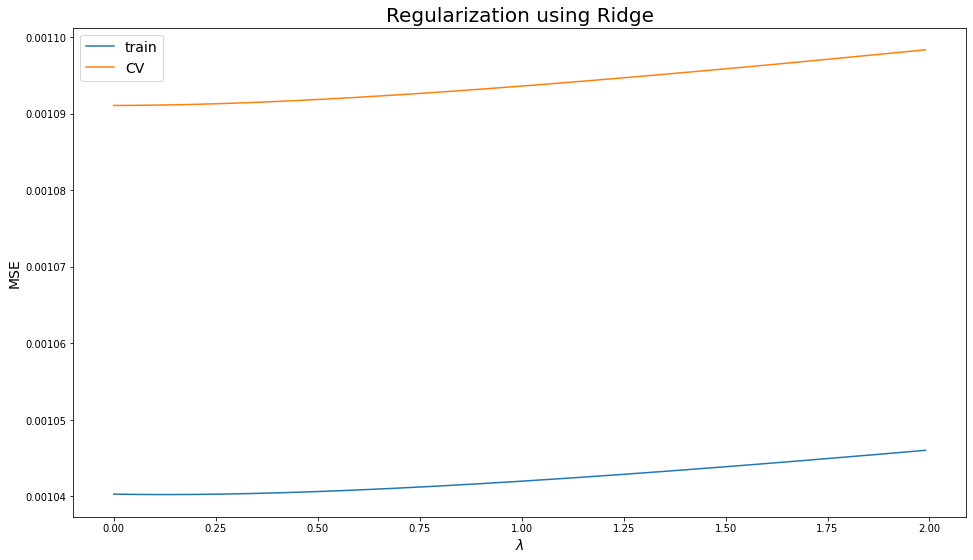

In [136]:
lambdas = np.arange(0,2, step=0.01)
ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_test ,ridge_train, "Regularization using Ridge")